## NNP Assignment(Name Prediction)

### Importing necessary modules

In [2]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [3]:
male_data = pd.read_csv("/home/user/Downloads/NNP Assignment/male.txt",comment='#',names=['name','category'])
female_data = pd.read_csv("/home/user/Downloads/NNP Assignment/female.txt",comment='#',names=['name','category'])
#pet_data = pd.read_csv("/home/user/Downloads/NNP Assignment/pet.txt",sep='\t+',comment='#',names=['name','category'])

In [4]:
male_data['category'] = 0  # zero for male
female_data['category'] = 1 # one for female
data = female_data.append(male_data)
name_gender_data =data.reset_index(drop=True)
name_gender_data.tail()

,name,category
7939,Zolly,0
7940,Zorro,0
7941,Rahul,0
7942,Shumeet,0
7943,Vibhu,0


### Maximum character in a name fn()

In [5]:
def name_length_max():
    z=0
    for i in name_gender_data['name']:
        leng = len(i)
        if z  < leng:
            z=leng
    return z
    
name_length_max()

15

### conversion of name to ascii values

In [6]:
def names_ascii():
    s = []
    for i in name_gender_data['name']:
        a= []
        for k in range(name_length_max()):
            if k < len(i):
                a.append((ord(i[k].lower())-97)/26)
            else:
                a.append(0)
        s.append(a)
    return s
x = names_ascii()

### Train and Test data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,name_gender_data['category'], test_size=0.20, random_state=30)

In [8]:
y_test.head()

7685    0
4778    1
6713    0
7261    0
2769    1
Name: category, dtype: int64

In [9]:
batch_size = 128
num_classes = y_train.nunique()
epochs = 50

In [10]:
y_test_1 = y_test # for one dimensional data

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test

array([0, 1, 0, ..., 1, 0, 0])

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

### MODEL-1
ONE HIDDEN LAYER

In [13]:
model1 = Sequential()

In [14]:
model1.add(Dense(524, activation='relu', input_shape=(15,)))
model1.add(Dense(524, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 524)               8384      
_________________________________________________________________
dense_2 (Dense)              (None, 524)               275100    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1050      
Total params: 284,534
Trainable params: 284,534
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
model1_fit = model1.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 1)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
5084/5084 [==============================] - 0s - loss: 0.6653 - acc: 0.6188 - val_loss: 0.6377 - val_acc: 0.6696
Epoch 2/50
5084/5084 [==============================] - 0s - loss: 0.6531 - acc: 0.6304 - val_loss: 0.6388 - val_acc: 0.6735
Epoch 3/50
5084/5084 [==============================] - 0s - loss: 0.6481 - acc: 0.6395 - val_loss: 0.6340 - val_acc: 0.6672
Epoch 4/50
5084/5084 [==============================] - 0s - loss: 0.6392 - acc: 0.6491 - val_loss: 0.6505 - val_acc: 0.6412
Epoch 5/50
5084/5084 [==============================] - 0s - loss: 0.6353 - acc: 0.6477 - val_loss: 0.6530 - val_acc: 0.6153
Epoch 6/50
5084/5084 [==============================] - 0s - loss: 0.6319 - acc: 0.6558 - val_loss: 0.6350 - val_acc: 0.6515
Epoch 7/50
5084/5084 [==============================] - 0s - loss: 0.6273 - acc: 0.6635 - val_loss: 0.6324 - val_acc: 0.6570
Epoch 8/50
5084/5084 [==============================] - 0s - loss: 0.6237 - a

In [18]:
#y_test

In [19]:
y_hat1 = model1.predict_classes(x_test)

1344/1589 [========================>.....] - ETA: 0s

In [20]:
pd.crosstab(y_hat1, y_test_1)

category,0,1
row_0,,
0,266,215
1,312,796


In [21]:
test_wrong = [im for im in zip(x_test, y_hat1, y_test_1) if im[1] != im[2]]
len(test_wrong)

527

In [22]:
test1_acc = (len(x_test)-len(test_wrong))/len(x_test)
test1_acc

0.6683448709880428

In [95]:
def acc_plot(model_fit):
    model_acc = model_fit.history['acc']
    model_val_acc = model_fit.history['val_acc']
    plt.plot(range(0,epochs), model_acc, color = 'green',label='train accuracy' )
    plt.legend()
    plt.plot(range(0,epochs), model_val_acc, color = 'red',label='validation accuracy' )
    plt.legend()
    plt.xlabel('No of epochs')
    plt.ylabel('accuracy')
    plt.show()

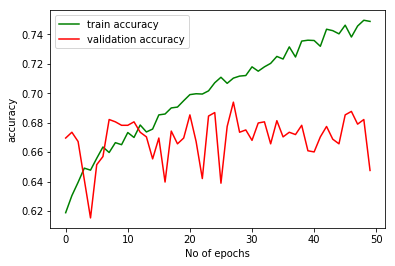

In [96]:
acc_plot(model1_fit)

In [36]:
model1_test_acc = model1.evaluate(x_test,y_test)[1]
model1_test_acc

1312/1589 [=======================>......] - ETA: 0s

0.66834487128812914

In [70]:
model1_train_acc = model1_fit.history['acc'][epochs-1]
model1_train_acc

0.74881982667346714

### MODEL-2 
TWO HIDDEN LAYERS

In [37]:
model2 = Sequential()
model2.add(Dense(524, activation='relu', input_shape=(15,)))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.summary()

model2.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model2_fit = model2.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 524)               8384      
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              537600    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 1,597,634
Trainable params: 1,597,634
Non-trainable params: 0
_________________________________________________________________
Train on 5084 samples, validate on 1271 samples
Epoch 1/50
5084/5084 [==============================] - 3s - loss: 0.6811 - acc: 0.6155 - val_loss: 0.6314 - val_acc: 0.6703
Epoch 2/50
5084/5084 [==============================] - 3s - loss: 0.6555 - acc: 0.6310 - v

In [38]:
y_hat2 = model2.predict_classes(x_test)

1568/1589 [============================>.] - ETA: 0s

In [39]:
pd.crosstab(y_hat2, y_test_1)

category,0,1
row_0,,
0,173,143
1,405,868


In [40]:
test_wrong = [im for im in zip(x_test, y_hat2, y_test_1) if im[1] != im[2]]
len(test_wrong)

548

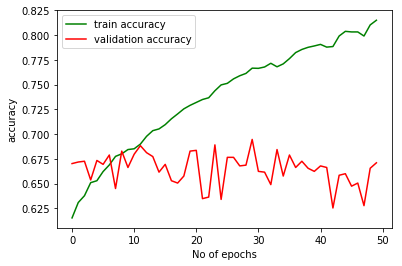

In [97]:
acc_plot(model2_fit)

In [43]:
model2_test_acc = model2.evaluate(x_test,y_test)[1]
model2_test_acc

1504/1589 [===========================>..] - ETA: 0s

0.65512901214475971

In [69]:
model2_train_acc = model2_fit.history['acc'][epochs-1]
model2_train_acc

0.81510621525001381

### MODEL-3
THREE HIDDEN LAYERS

In [44]:
model3 = Sequential()
model3.add(Dense(524, activation='relu', input_shape=(15,)))
model3.add(Dense(524, activation='relu'))
model3.add(Dense(524, activation='relu'))
model3.add(Dense(524, activation='relu'))
model3.add(Dense(2, activation='softmax'))
model3.summary()

model3.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model3_fit = model3.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 524)               8384      
_________________________________________________________________
dense_9 (Dense)              (None, 524)               275100    
_________________________________________________________________
dense_10 (Dense)             (None, 524)               275100    
_________________________________________________________________
dense_11 (Dense)             (None, 524)               275100    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1050      
Total params: 834,734
Trainable params: 834,734
Non-trainable params: 0
_________________________________________________________________
Train on 5084 samples, validate on 1271 samples
Epoch 1/50
5084/5084 [==============================] - 1s - loss: 0.6706 - acc: 0.6170 

In [45]:
y_hat3 = model3.predict_classes(x_test)

1312/1589 [=======================>......] - ETA: 0s

In [46]:
pd.crosstab(y_hat3, y_test_1)

category,0,1
row_0,,
0,252,229
1,326,782


In [47]:
test_wrong = [im for im in zip(x_test, y_hat3, y_test_1) if im[1] != im[2]]
print(len(test_wrong))

555


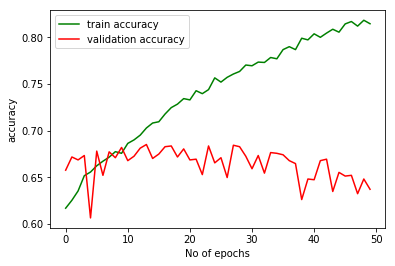

In [98]:
acc_plot(model3_fit)

In [49]:
model3_test_acc = model3.evaluate(x_test,y_test)[1]
model3_test_acc

1376/1589 [========================>.....] - ETA: 0s

0.650723725876169

In [68]:
model3_train_acc = model3_fit.history['acc'][epochs-1]
model3_train_acc

0.81471282407864165

### MODEL-4
FOUR HIDDEN LAYERS

In [50]:
model4 = Sequential()
model4.add(Dense(524, activation='relu', input_shape=(15,)))
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.summary()

model4.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model4_fit = model4.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 524)               8384      
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              537600    
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 2050      
Total params: 3,696,834
Trainable params: 3,696,834
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_hat4 = model4.predict_classes(x_test)

1568/1589 [============================>.] - ETA: 0s

In [52]:
pd.crosstab(y_hat4, y_test_1)

category,0,1
row_0,,
0,287,279
1,291,732


In [53]:
test_wrong = [im for im in zip(x_test, y_hat4, y_test_1) if im[1] != im[2]]
len(test_wrong)

570

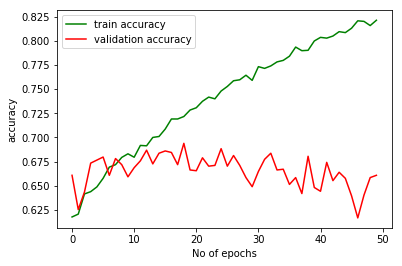

In [99]:
acc_plot(model4_fit)

In [55]:
model4_test_acc = model4.evaluate(x_test,y_test)[1]
model4_test_acc

1589/1589 [==============================] - 0s     


0.64128382660593908

In [67]:
model4_train_acc = model4_fit.history['acc'][epochs-1]
model4_train_acc

0.82120377603804007

### MODEL-5
FIVE HIDDEN LAYERS

In [56]:
model5 = Sequential()
model5.add(Dense(524, activation='relu', input_shape=(15,)))
model5.add(Dense(524, activation='relu'))
model5.add(Dense(1024, activation='relu'))
model5.add(Dense(1024, activation='relu'))
model5.add(Dense(2048, activation='relu'))
model5.add(Dense(2048, activation='relu'))
model5.add(Dense(2, activation='softmax'))
model5.summary()

model5.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model5_fit = model5.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 1
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 524)               8384      
_________________________________________________________________
dense_20 (Dense)             (None, 524)               275100    
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              537600    
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 4098      
Total para

In [57]:
y_hat5 = model5.predict_classes(x_test)

1568/1589 [============================>.] - ETA: 0s

In [58]:
pd.crosstab(y_hat5, y_test_1)

category,0,1
row_0,,
0,262,283
1,316,728


In [59]:
test_wrong = [im for im in zip(x_test, y_hat5, y_test_1) if im[1] != im[2]]
print(len(test_wrong))

599


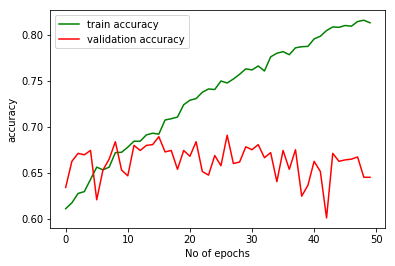

In [100]:
acc_plot(model5_fit)

In [61]:
model5_test_acc = model5.evaluate(x_test,y_test)[1]
model5_test_acc

1589/1589 [==============================] - 1s     


0.6230333546859953

In [66]:
model5_train_acc = model5_fit.history['acc'][epochs-1]
model5_train_acc

0.81274586915969849

### Final plot which compares all models based on Training accuracy and Test accuracy

In [ ]:
train_acc_final = [model1_train_acc,model2_train_acc,model3_train_acc,model4_train_acc,model5_train_acc]
test_acc_final = [model1_test_acc,model2_test_acc,model3_test_acc,model4_test_acc,model5_test_acc]
x = [1,2,3,4,5]

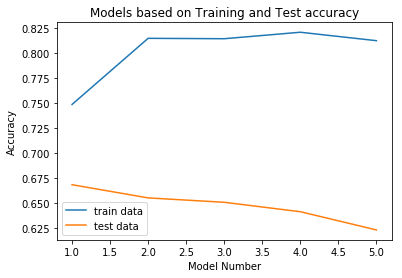

In [157]:
plt.plot(x,train_acc_final,label='train data')
plt.legend()
plt.plot(x,test_acc_final,label='test data')
plt.legend()
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Models based on Training and Test accuracy')
plt.show()

In [101]:
train_acc_final,test_acc_final

([0.74881982667346714,
  0.81510621525001381,
  0.81471282407864165,
  0.82120377603804007,
  0.81274586915969849],
 [0.66834487128812914,
  0.65512901214475971,
  0.650723725876169,
  0.64128382660593908,
  0.6230333546859953])

### Early Stopping

In [160]:
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

In [161]:
model5_fit = model5.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 2,
          callbacks = z
)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
12s - loss: 0.3241 - acc: 0.8611 - val_loss: 1.1529 - val_acc: 0.6507
Epoch 2/50
12s - loss: 0.3073 - acc: 0.8633 - val_loss: 1.2350 - val_acc: 0.6444
Epoch 3/50
11s - loss: 0.3083 - acc: 0.8605 - val_loss: 1.3119 - val_acc: 0.6475
Epoch 4/50
12s - loss: 0.3048 - acc: 0.8637 - val_loss: 1.0322 - val_acc: 0.6648
Epoch 5/50
12s - loss: 0.2918 - acc: 0.8631 - val_loss: 1.2449 - val_acc: 0.6664
Epoch 6/50
12s - loss: 0.2881 - acc: 0.8633 - val_loss: 1.1513 - val_acc: 0.6522
Epoch 7/50
13s - loss: 0.2873 - acc: 0.8718 - val_loss: 1.0588 - val_acc: 0.6499
Epoch 8/50
14s - loss: 0.2800 - acc: 0.8662 - val_loss: 1.1474 - val_acc: 0.6515
Epoch 00007: early stopping
